# Decision Tree

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.tree import DecisionTreeRegressor

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Decision Tree Model

In [4]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [5]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [6]:
OSNIR_est = (model.predict(Input_num))

In [7]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[34.0, -3.0, 100.0, 25.0, 0.0, 9.0] => 9.953708 (expected 10.154549)
[12.0, -6.0, 100.0, 25.0, 0.0, 9.0] => 11.973392 (expected 11.973392)
[25.0, 0.0, 10.0, 25.0, 0.0, 3.0] => 20.512418 (expected 20.360340)
[16.0, -2.0, 100.0, 25.0, 0.0, 9.0] => 13.817377 (expected 14.058336)
[17.0, -5.0, 10.0, 50.0, 0.0, 9.0] => 26.259617 (expected 26.358757)
[17.0, -9.0, 100.0, 25.0, 0.0, 9.0] => 7.633840 (expected 7.633840)
[47.0, -2.0, 100.0, 12.5, 0.0, 9.0] => 9.099393 (expected 9.175805)
[3.0, -3.0, 10.0, 12.5, 0.0, 9.0] => 29.779781 (expected 29.145551)
[42.0, 3.0, 10.0, 25.0, 25.0, 9.0] => 12.507435 (expected 12.507435)
[7.0, 3.0, 10.0, 25.0, 25.0, 9.0] => 25.351603 (expected 23.759684)


In [8]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [9]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_DT.csv",index=False)

(array([0.00066689, 0.00033344, 0.        , 0.        , 0.00066689,
        0.00200067, 0.00266756, 0.00333444, 0.00333444, 0.00433478,
        0.00466822, 0.00800267, 0.00700233, 0.01600534, 0.01900634,
        0.02934311, 0.04668223, 0.06268756, 0.10403468, 0.14571524,
        0.26108703, 0.10403468, 0.06602201, 0.04301434, 0.02634211,
        0.01233745, 0.00833611, 0.00633545, 0.00233411, 0.00333444,
        0.00166722, 0.00233411, 0.00100033, 0.00033344, 0.00033344,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

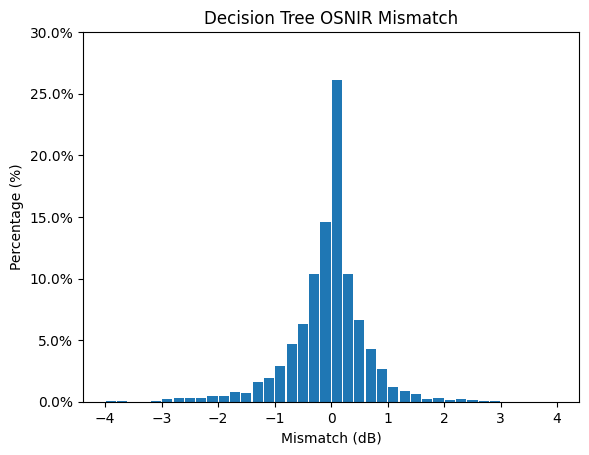

In [14]:
plt.title('Decision Tree OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.ylim(0, 0.3)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )